# Demonstration of NUrF function module

The Nurf Python module contains functions to extract UV and fluo data from a LoKI.nxs file.<br>
It is capable of correcting the measured spectra for reference and dark current. It calculates the final fluo and UV spectra and plots them. 
A median filter can be applied to the spectra.<br> 
For UV the following parameters can be extracted:<br>
- Absorbance at 280nm
- Turbidity and m, b factor

For fluo the following parameters can be extracted:<br>
- Maximum peak intensity
- Peak position corresponding to the maximum peak intensity

Besides standard Python libraries like matplotlib, os, scipy, and numpy, it is relies on scipp, scippnexus, and scippneutron. 

Prepare the stage and load the required tools.

In [1]:
from nurf import *
from utils import *
from ill_auxilliary_funcs import *
from scipp.signal import butter, sosfiltfilt

The code below uses UV and fluo data that was colleced in a multi-modal SANS, UV, Fluo experiment at ILL. One experiment is composed of a series of measurement. In each measurement, UV and fluo spectra were recorded. Alongside the sample, dark and reference measurements were recorded. Here, exp5 and exp6, exp2 and exp3, exp7 and exp8 form complementary datasets.  

Provide information on where the relevant files are and which files belong to which experimental datasets.

In [3]:
# Prepare for export to .dat for uv and fluo

# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
# change to folder
os.chdir(process_folder)

# export path for .dat files
path_output='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version/dat-files'

# experimental data sets
exp5= [66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]

exp2= [65925, 65927, 65930, 65933, 65936, 65939, 65942, 65945, 65948, 65951, 65954, 65957]
exp3= [65962, 65965, 65968, 65971, 65974, 65977, 65980, 65983, 65986, 65989, 65992]

exp7= [66083, 66086, 66089, 66092, 66095, 66098, 66101, 66104, 66107, 66110, 66113]
exp8= [66116, 66119, 66122, 66125, 66128, 66131, 66134, 66137, 66140, 66143, 66146]

The cell below shows how to export from LoKI.nxs to a generic Ascii file .dat if the users would like to use .dat files.

In [4]:
# List comprehensions for export to .dat
all_data=[exp2, exp3,  exp5, exp6, exp7, exp8]

# Create one list only with all entries of the exp sets
all_data_flat = sum(all_data, [])

# convert numbers to file names
all_file_names = [complete_fname(i) for i in all_data_flat]

# export uv data for all_data to .dat
[export_uv(m, path_output) for m in all_file_names]

#export fluo data for all_data to .dat
[export_fluo(m, path_output) for m in all_file_names]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Plotting of UV spectra for exp5 and exp6 

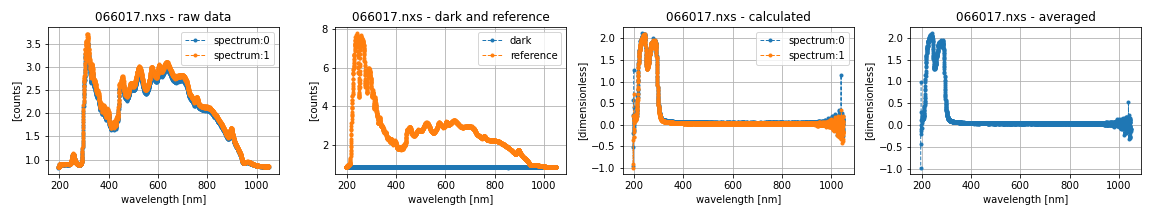

In [2]:
# Plot two uv sets

# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

# exp 5 and exp 6
exp5=[66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]

# Create filenames 
flist_num=complete_fname(exp5)

# Plotting exp5
main_title='Exp 5'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)

pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-1, vmax=6)
pl2.ax.set_title(main_title)
#modify plots
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)

#Example to plot one UV file. 
plot_uv('066017.nxs')

# We can gather all normalized uv data in a sc.Dataset
uv_exp5_set=gather_uv_set(flist_num)


# Repeating all steps above for exp6.
flist_num=complete_fname(exp6)
main_title='Exp 6'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)
plt.tight_layout()

pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-1, vmax=6)
pl2.ax.set_title(main_title)
plt.tight_layout()
#modify plots
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)
uv_exp6_set=gather_uv_set(flist_num)

### Back to some basic code functionality 
This cell shows how to load a Loki.nxs files, what is returned and how to separate the components in the .nxs file (sample, darf, reference).

In [ ]:
name='066017.nxs'
with snx.File(name) as f:
    uv = f["entry/instrument/uv"][()]

print('Output of .nxs is of type ', type(uv))
display(uv)
da=uv
dark = da[da.coords["is_dark"]].squeeze()
ref = da[da.coords["is_reference"]].squeeze()
sample = da[da.coords["is_data"]]   


print('Sample is', type(sample))
display(sample)
print('Dark is ', type(dark))
display(dark)

## Plot fluo data for two single measurements

In [ ]:
# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

# Plot two fluo examples
name='066017.nxs' #exp5
#name='066050.nxs' #exp6
#name='066053.nxs' #exp6
#name='066083.nxs' #exp7
#name='066116.nxs' #exp8 
#name='065925.nxs' #exp2
#name='065962.nxs' #exp3
plot_fluo(name)

exp2=[65925, 65927, 65930, 65933, 65936, 65939, 65942, 65945, 65948, 65951, 65954, 65957]
exp3= [65962, 65965, 65968, 65971, 65974, 65977, 65980, 65983, 65986, 65989, 65992]

# converts numbers to full filenames
#flist_num=complete_fname(exp2)

name='065925.nxs'
plot_fluo(name)

## Plot UV data for exp7 and exp8

In [ ]:
# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

exp7= [66083, 66086, 66089, 66092, 66095, 66098, 66101, 66104, 66107, 66110, 66113]
exp8= [66116, 66119, 66122, 66125, 66128, 66131, 66134, 66137, 66140, 66143, 66146]


flist_num=complete_fname(exp7)
main_title='Exp 7'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)

pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-1, vmax=7)
pl2.ax.set_title(main_title)
#modify plots,
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)


uv_exp7_set=gather_uv_set(flist_num)

flist_num=complete_fname(exp8)
main_title='Exp 8'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)

pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-1, vmax=10)
pl2.ax.set_title(main_title)
#modify plots
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)


uv_exp8_set=gather_uv_set(flist_num)


## Plot UV data for exp2 and exp3. In addition UV for two single measurements are shown.

In [ ]:
exp2=[65925, 65927, 65930, 65933, 65936, 65939, 65942, 65945, 65948, 65951, 65954, 65957]
exp3= [65962, 65965, 65968, 65971, 65974, 65977, 65980, 65983, 65986, 65989, 65992]


flist_num=complete_fname(exp2)
main_title='Exp 2'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)


pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-2, vmax=4)
pl2.ax.set_title(main_title)
#modify plots
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)


uv_exp2_set=gather_uv_set(flist_num)

name_s='065957.nxs'
plot_uv(name_s)
name_s='065925.nxs'
plot_uv(name_s)


flist_num=complete_fname(exp3)
main_title='Exp 3'
pl1=plot_uv_set(flist_num, lambda_min=None, lambda_max=None, vmin=None, vmax=None)
pl1.ax.set_title(main_title)


pl2=plot_uv_set(flist_num, lambda_min=200,lambda_max=400, vmin=-2, vmax=5)
pl2.ax.set_title(main_title)
#modify plots
fig_handles=[pl1, pl2]
modify_plt_app(fig_handles)


uv_exp3_set=gather_uv_set(flist_num)

## Exploring filter possibilities


In [ ]:
# Explore median filter

# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

name='066017.nxs' #exp5
#name='066050.nxs'   #exp6
#name='066053.nxs' #exp6
#name='066083.nxs' #exp7
#name='066116.nxs' #exp8 
#name='065925.nxs' #exp2
#name='065962.nxs' #exp3

#plot_fluo(name)


fluo_dict=load_fluo(name)
fluo_da=normalize_fluo(**fluo_dict)

display(fluo_da)

spectra_number=7 

def explore_medfilt(name, spectra_number=0, lmin=250, lmax=500):

    #load fluo data
    fluo_dict=load_fluo(name)
    fluo_da=normalize_fluo(**fluo_dict)

    # prepare a curve
    yfluo=fluo_da['spectrum',spectra_number].values
    xfluo=fluo_da.coords['wavelength'].values
    
    #slicing values
    # lidx
    lidx=np.where(np.logical_and((xfluo>=lmin),  (xfluo<=lmax)))
    xfluo_filt=xfluo[lidx]
    yfluo_filt=yfluo[lidx]

    nsp=3
    fig, ax = plt.subplots(1,nsp, figsize=(30,7))


    ax[0].plot(xfluo,yfluo)
    #yes, we want the zero line
    ax[1].plot(xfluo,yfluo-yfluo)
    ax[2].plot(xfluo_filt, yfluo_filt)
    #example medfilt
    kernel=[]
    kernel_range=range(3,20,2)


    for i in kernel_range:

        yfluomed=medfilt(yfluo, i)
        ax[0].plot(xfluo, yfluomed)
        ax[1].plot(xfluo,yfluo-yfluomed)
        kernel.append(str(i))

        # zommed in
        yfluomed_filt=medfilt(yfluo_filt, i)
        ax[2].plot(xfluo_filt, yfluomed_filt)

    
    colors=line_colors(len(kernel_range)+1)
    #print('Colors contains,' ,len(colors))
    ax[0].set_ylabel('Fluo intensity')
    ax[1].set_ylabel('Difference between medfilter and signal')
    ax[2].set_ylabel('Fluo intensity')

    title_string=f"Influence of a median filter, {name}, spectrum {str(spectra_number)}"

    for m in range(0,nsp):
        ax[m].legend(['None', *kernel])
        ax[m].set_xlabel('Wavelength [nm]')
        ax[m].set_title(title_string)
        ax[m].grid()
        [ax[m].get_lines()[i].set_color(colors[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_legend().legendHandles[i].set_color(colors[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_marker(markers()[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_markersize(2) for i in range(0,len(kernel_range)+1)]
        #[ax[m].get_lines()[i].set_markevery(5) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_legend().legendHandles[i].set_marker(markers()[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_linewidth(1) for i in range(0,len(kernel_range)+1)]


explore_medfilt(name, spectra_number=7, lmin=300, lmax=400)


# scipy.signal.medfilt not yet supported by scipp
# Simon suggests to check out
#https://scipp.github.io/generated/modules/scipp.signal.html



# Check if fluo wavelength is regular. But it is not regular. 
# Calculate the difference between two adjacent wavelength entries 
xw=fluo_da.coords['wavelength'].values
xdiff = [xw[n]-xw[n-1] for n in range(1,len(xw))]
#print(xdiff)


def explore_butter(name,  spectra_number=0, lmin=250, lmax=500):
    from scipp.signal import butter, sosfiltfilt

    #load fluo data
    fluo_dict=load_fluo(name)
    fluo_da=normalize_fluo(**fluo_dict)

    # prepare a curve
    yfluo=fluo_da['spectrum',spectra_number].values
    x = fluo_da.coords['wavelength']
    # conversion to float64 due to a bug
    fluo_da.coords['wavelength'] = sc.linspace(x.dim, x.values[0], x.values[-1], num=len(x), unit=x.unit, dtype='float64')
    #out=butter(fluo_da.coords['wavelength'], N=12, Wn=0.04/ x.unit).filtfilt(fluo_da.data, 'wavelength')  #this applies the butter filter to the whole fluo dataarray
    #out=butter(fluo_da['spectrum',spectra_number].coords['wavelength'], N=12, Wn=0.04/ x.unit).filtfilt(fluo_da['spectrum',spectra_number].data, 'wavelength')  # I want to apply the butter filter only to one spectrum

    #slicing values
    # lidx
    lidx=np.where(np.logical_and((fluo_da.coords['wavelength'].values>=lmin),  (fluo_da.coords['wavelength'].values<=lmax)))
    xfluo_filt=x.values[lidx]
    yfluo_filt=yfluo[lidx]


    
    # butter parameters
    Wn_range=[0.5,0.3,0.04]
    N_range=[12,4]
    
    nsp=3
    fig, ax = plt.subplots(1,nsp, figsize=(30,7))
    ax[0].plot(x.values,fluo_da['spectrum',spectra_number].values)
    ax[1].plot(x.values, fluo_da['spectrum',spectra_number].values-fluo_da['spectrum',spectra_number].values)
    ax[2].plot(xfluo_filt,yfluo_filt)

    ax[0].set_ylabel('Fluo intensity')
    ax[2].set_ylabel('Fluo intensity')
    ax[1].set_ylabel('Difference between butter and signal')

    para_list=[]
    for i in Wn_range:
        for m in N_range:
            out=butter(fluo_da['spectrum',spectra_number].coords['wavelength'], N=m, Wn=i/ x.unit).filtfilt(fluo_da['spectrum',spectra_number].data, 'wavelength')  
            ax[0].plot(x.values, out.values)
            para_out=[m,i]
            para_list.append(para_out)
            ax[1].plot(x.values,fluo_da['spectrum',spectra_number].values-out.values)
            ax[2].plot(xfluo_filt,out.values[lidx])

    kernel_length=len(Wn_range)*len(N_range)
    kernel_range=para_list

    #ax[0].plot(x.values, out['spectrum',spectra_number].values)
    #ax[0].plot(x.values, out.values)

    title_string=f"Influence of a butter filter, {name}, spectrum {str(spectra_number)}"


    colors=line_colors(len(kernel_range)+1)
    for m in range(0,nsp):
        ax[m].legend(['None', *kernel_range])
        ax[m].set_xlabel('Wavelength [nm]')
        ax[m].set_title(title_string)
        ax[m].grid()
        [ax[m].get_lines()[i].set_color(colors[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_legend().legendHandles[i].set_color(colors[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_marker(markers()[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_markersize(2) for i in range(0,len(kernel_range)+1)]
        #[ax[m].get_lines()[i].set_markevery(5) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_legend().legendHandles[i].set_marker(markers()[i]) for i in range(0,len(kernel_range)+1)]
        [ax[m].get_lines()[i].set_linewidth(1) for i in range(0,len(kernel_range)+1)]



explore_butter(name, spectra_number=7, lmin=300, lmax=400)


# there is a bug, hence conversion to float64
#fluo_da.coords['wavelength'] = fluo_da.coords.pop('wavelength').to(dtype='float64')
#out = butter(fluo_da.coords['wavelength'], N=4, Wn=20 / fluo_da.coords['wavelength'].unit).filtfilt(fluo_da,'wavelength')
# Above line fails currently, because the coords for wavelength are not regular

#Simon suggestion

#x = fluo_da.coords['wavelength']
#fluo_da.coords['wavelength'] = sc.linspace(x.dim, x.values[0], x.values[-1], num=len(x), unit=x.unit, dtype='float64')
#out=butter(fluo_da.coords['wavelength'], N=12, Wn=0.04/ x.unit).filtfilt(fluo_da.data, 'wavelength')


## Developing functions for a data analysis pipeline for UV, fluo spectroscopy


In [ ]:
# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

name='065992.nxs'
#load uv data
uv_dict=load_uv(name)
#display(uv_dict['data'],uv_dict['reference'],uv_dict['dark'])
uv_da=normalize_uv(**uv_dict) #returns sc.DataArray with all uv spectra present in file
#display(uv_da)

plot_uv(name)
uv_turbidity_fit(uv_da, wl_unit=sc.Unit('nm'), fit_llim=500, fit_ulim=850, b_llim=300, b_ulim=400,m=0.1, plot_corrections=True)


### UV pipeline

In [ ]:
# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

""" What functions are available for uv data? Overview on only the function names
#How to apply a medilter to fluo or uv data? 
apply_medfilter

#This is for uv
#Extract uv peak intensity
uv_peak_int

#Plot uv peak intensity
plot_uv_peak_int

#Quickly check uv data
uv_quick_data_check

#plot mulitple uv peak int
plot_multiple_uv_peak_int

#turbidity
turbidity

#residuals
residual

#UV turbidity fit
uv_turbidity_fit

#multi turbidity fit
multi_uv_turbidity_fit
"""

#%%%%%%%%%%%%%%%%%%%%%%%%%%%    Code examples        %%%%%%%%%%%%%%%%%%%%%%%%%%

name='066017.nxs'
#load uv data
uv_dict=load_uv(name)
#display(uv_dict['data'],uv_dict['reference'],uv_dict['dark'])
uv_da=normalize_uv(**uv_dict) #returns sc.DataArray with all uv spectra present in a LoKI.nxs file
#display(uv_da)

#How to apply a medfilter to a uv dataarray
#apply_medfilter(uv_da,kernel_size=9)  #applies median filter to multiple spectra in uv_da
#apply_medfilter(process_uv(name),kernel_size=9) #applies median filter to normalised spectra resulting from process_uv

# Plots uv peak intensity for a given nexus file
uv_280_result=uv_peak_int(uv_da, wavelength=None, wl_unit=sc.Unit('nm'), tol=None)
plot_uv_peak_int(uv_da, name, wavelength=None, wl_unit=sc.Unit('nm'), tol=1)

# exp 5 and exp 6
exp5=[66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
#exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]

# Create complete filenames 
#flist_num=complete_fname(exp5)
#flist_num=complete_fname(exp6)

# a quic visualisation check if all files have equivalent number of spectra
#uv_quick_data_check(flist_num, wavelength=None, wl_unit=None, tol=None, medfilter=False, kernel_size=None)

# select peak intensities at 280nm and plot them
plot_multiple_uv_peak_int(flist_num, wavelength=280, wl_unit=None, tol=None, medfilter=True, kernel_size=None)

# Plot the spectra in a single LoKI.nxs file
#plot_uv('066020.nxs')

# Plot multiple UV spectra for a given set of files
#plot_uv_set(flist_num)

# Example for tubidity
#uv_turbidity_fit(uv_da, wl_unit=sc.Unit('nm'), fit_llim=300, fit_ulim=850, b_llim=450, b_ulim=700,m=0.1, plot_corrections=True)

# Performs for a given set of files turbidity correction
uv_da_multi=uv_multi_turbidity_fit(flist_num, wl_unit=sc.Unit('nm'), fit_llim=300, fit_ulim=850, b_llim=450, b_ulim=700,m=0.1, plot_corrections=True)




  

### Fluo pipeline

In [ ]:
# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
os.chdir(process_folder)

""" What functions are available for fluo data? Overview on only the function names
#How to apply a medilter to fluo or uv data? 
apply_medfilter

#Fluo peak intensity
fluo_peak_int

#Plot fluo peak intensity
plot_fluo_peak_int

#Plot multiple peak intensities
plot_fluo_multiple_peak_int
"""

#Example of how to load one nexusfile and extract the fluo dataarray
#name='066017.nxs' #exp5
#fluo_dict=load_fluo(name)
#fluo_da=normalize_fluo(**fluo_dict)
#display(fluo_da)    


# Example of how to apply the med filter to a fluo dataarray fluo_da
#apply_medfilter(fluo_da,kernel_size=9)
#apply_medfilter(fluo_da['spectrum', 7:9], kernel_size=9)
#apply_medfilter(fluo_da['spectrum', 7], kernel_size=9) 
#plot_fluo(name)
#fluo_filt_max=fluo_peak_int(fluo_da, wllim=None, wulim=None, wl_unit=None, medfilter=True, kernel_size=15)
#display(fluo_filt_max)
#plot_fluo_peak_int(fluo_da,name, wllim=300, wulim=400, wl_unit=None, medfilter=True, kernel_size=15)

exp5=[66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
flist_num5=complete_fname(exp5)
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]
flist_num6=complete_fname(exp6)


def plot_fluo_multiple_peak_int(filelist, wllim=None, wulim=None, wl_unit=None, medfilter=True, kernel_size=None):
    """ Plots multiple peak intensities for fluo spectr
    
    """
    import itertools
    marker = itertools.cycle(markers()) 


    print(filelist)

    figure_size=(15,5)
    fig, ax=plt.subplots(nrows=1,ncols=2,figsize=figure_size, constrained_layout=True)

   
    unique_mwl=[]
    ds_list=[]
    for name in filelist:
        fluo_dict=load_fluo(name)
        fluo_da=normalize_fluo(**fluo_dict)
        #extract max int value and corresponding wavelength position, median filter is applied
        fluo_filt_max=fluo_peak_int(fluo_da, wllim=wllim, wulim=wulim, wl_unit=wl_unit, medfilter=medfilter, kernel_size=kernel_size)  
        # attach filename as attribute to dataarray
        #fluo_filt_max.attrs['filename'] = sc.scalar(name)
        #display(fluo_filt_max)
        ds_list.append(fluo_filt_max)
        unique_mwl.append(np.unique(fluo_filt_max.coords['monowavelengths'].values))
        #print(fluo_filt_max)

        #same marker for both plots for the same file
        markerchoice=next(marker)

        ax[0].plot(fluo_filt_max.coords['monowavelengths'].values, fluo_filt_max['intensity_max'].values, label=f'{name}', linestyle="None", marker=markerchoice, markersize=10)
        ax[0].set_ylabel('Max. Intensity')
        ax[0].set_title('Fluo - max. intensity')

        ax[1].plot(fluo_filt_max.coords['monowavelengths'].values, fluo_filt_max['wavelength_max'].values, label=f'{name}', linestyle="None", marker=markerchoice, markersize=10)
        unit_str=str(fluo_filt_max['wavelength_max'].unit)

        ax[1].set_ylabel(f'Wavelength [{unit_str}]')
        ax[1].set_title(f'Fluo - corresponding wavelength')

    # show the lowest monowavelength as lower boundary on the y-axis
    ax[1].set_ylim(bottom=0.9*np.min(fluo_filt_max.coords['monowavelengths'].values))

    # plot the found monowavelengths as additional visual information on the y-axis 
    for mwl in np.unique(unique_mwl):
            ax[1].plot(np.unique(unique_mwl), np.full(np.shape(np.unique(unique_mwl)), mwl) , '--', label=f"{mwl}{sc.Unit('nm')}")
    #ax[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.05))    
    
    for axes in ax:
        #axes.legend(loc='upper right', bbox_to_anchor=(1.1, 1.00))    
        axes.legend( bbox_to_anchor=(1.04, 1))    
        axes.grid(True)
        axes.set_xlabel('Monowavelengths')
    
    
    display(fig)

plot_fluo_multiple_peak_int(flist_num5,wllim=300, wulim=400, wl_unit=None, medfilter=True, kernel_size=15)
plot_fluo_multiple_peak_int(flist_num6,wllim=300, wulim=400, wl_unit=None, medfilter=True, kernel_size=15)


#If I understood scipp correctly, I can only have a Dataset, where each DataArray is the same. So if one DataArray has 2 spectra, one DataArray only one, it should not be possible to put them together in a Dataset.
#Correct. But you could have an 1-D data array and a 2-D data array in the same dataset, if they have the same length along the shared dimension.


In [ ]:
#How to access for a given filename the fluo dataarray.
name='066017.nxs'
fluo_dict=load_fluo(name)
fluo_da=normalize_fluo(**fluo_dict)
display(fluo_da)
print(f'Number of fluo spectra in {name}: {fluo_da.sizes["spectrum"]}' )

#apply medfilter to fluo sc.DataArray
fluo_da_filt=apply_medfilter(fluo_da, kernel_size=15)

#showcasing scipp dataarray graphical presentation
sc.show(fluo_da_filt)

In [ ]:
#### Extract from fluorescence measurements the maximum intensity and the corresponding wavelength.

#Fluo Max int, max wavelength

exp5=[66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
flist_num=complete_fname(exp5)

fluo_int_dict=fluo_maxint_max_wavelen(flist_num,wllim=300, wulim=400, wl_unit=None, medfilter=True, kernel_size=15)

fluo_plot_maxint_max_wavelen(fluo_int_dict)  

### Plot a selected fluo spectrum across a series of measurements

In [ ]:
# Here we plot a certain fluo spectrum for all measurements in a whole experimental series. Here spectrum #1 corresponds to the white light spectrum.

exp5=[66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
flist_num5=complete_fname(exp5)
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]
flist_num6=complete_fname(exp6)

fwls=plot_fluo_spectrum_selection(flist_num5, spectral_idx=1, kernel_size=15, wllim=400, wulim=500)
fwls=plot_fluo_spectrum_selection(flist_num6, spectral_idx=1, kernel_size=15, wllim=400, wulim=500)



Testing ground

In [5]:
name='066017.nxs'

uv_dict=load_nurfloki_file(name,'uv')
display(uv_dict)

fluo_dict=load_nurfloki_file(name,'fluorescence')
display(fluo_dict)


{'sample': <scipp.DataArray>
 Dimensions: Sizes[spectrum:2, wavelength:3648, ]
 Coordinates:
   integration_time            int32            [µs]  (spectrum)  [4000, 4000]
   is_dark                      bool        <no unit>  (spectrum)  [False, False]
   is_data                      bool        <no unit>  (spectrum)  [True, True]
   is_reference                 bool        <no unit>  (spectrum)  [False, False]
   time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
   wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
 Data:
                             float32         [counts]  (spectrum, wavelength)  [0.828352, 0.839309, ..., 0.857075, 0.857075]
 ,
 'reference': <scipp.DataArray>
 Dimensions: Sizes[wavelength:3648, ]
 Coordinates:
   wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
 Data:
                             flo